# Models

In [1]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
import sncosmo

%matplotlib inline

## Initializing a model

In [2]:
model = sncosmo.Model(source='salt2')

In [3]:
# a model is initialized with some set of parameters
model.param_names

['z', 't0', 'x0', 'x1', 'c']

In [4]:
model.parameters

array([ 0.,  0.,  1.,  0.,  0.])

In [5]:
# printing a model will display some information and the current parameters
print(model)

source:
  class      : SALT2Source
  name       : 'salt2'
  version    : 2.4
  phases     : [-20, .., 50] days
  wavelengths: [2000, .., 9200] Angstroms
parameters:
  z  = 0.0
  t0 = 0.0
  x0 = 1.0
  x1 = 0.0
  c  = 0.0


## Setting parameters

In [6]:
# setting and getting parameters by name
model.set(x1=1.0)

In [7]:
# set multiple parameters at once
model.set(z=0.5, x0=1.e-6, x1=0.5, c=0.2)

In [8]:
# this is equivalent:
params = {'z': 0.5, 'x0': 1.e-6, 'x1': 0.5, 'c': 0.2}
model.set(**params)

In [9]:
# get parameters by name
model.get('x1')

0.5

## Spectrum

The most basic thing you can do with a model is ask what its spectrum looks like at a given time.

In [10]:
# get individual times and wavelengths
model.flux(0., 4000.)

6.0842380131068079e-21

In [11]:
# arrays or lists work as you'd expect:
model.flux(0., [3000., 4000.])

array([ -5.74626771e-41,   6.08423801e-21])

In [12]:
# time introduces a second dimension
model.flux(time=[0., 1.], wave=[3000., 4000.])

array([[ -5.74626771e-41,   6.08423801e-21],
       [ -4.79736731e-41,   5.51567414e-21]])

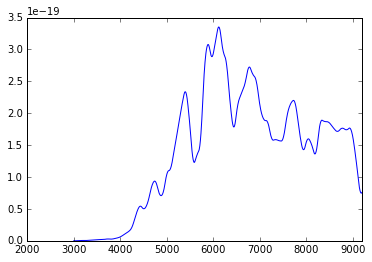

In [13]:
# plot the spectrum
wave = np.linspace(3000., 9200., 1000)
flux = model.flux(0., wave)

plt.plot(wave, flux)
plt.ylim(ymin=0.)
plt.xlim(2000, 9200);

In [14]:
# light curve at wavelength = 4000 angstroms
time = np.linspace(-20., 50., 71)
flux = model.flux(time, 8000.)
flux.shape

(71, 1)

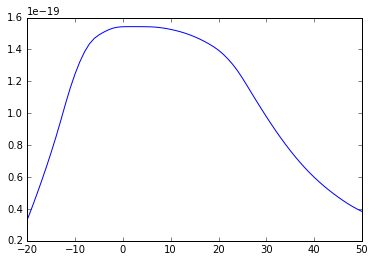

In [15]:
plt.plot(time, flux[:,0]);

## Bandpasses

In [16]:
# there are a lot of built-in bandpasses
band = sncosmo.get_bandpass('sdssg')

(see https://sncosmo.readthedocs.io/en/latest/bandpass-list.html)

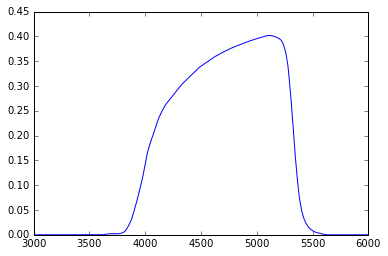

In [17]:
wave = np.linspace(3000., 6000., 1000)
plt.plot(wave, band(wave));

In [18]:
# create a bandpass
band = sncosmo.Bandpass([4000., 5000.], [1., 1.], name='tophatg')

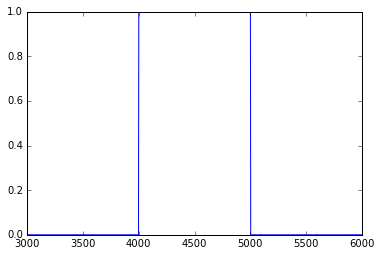

In [19]:
wave = np.linspace(3000., 6000., 1000)
plt.plot(wave, band(wave));

## Synthetic Photometry

In [20]:
model.bandmag('sdssr', 'ab', [0., 10., 20.])

array([ 25.15592119,  25.4711469 ,  26.13593855])

In [21]:
# equivalent to:
band = sncosmo.get_bandpass('sdssr')
magsys = sncosmo.get_magsystem('ab')
model.bandmag(band, magsys, [0., 10., 20.])

array([ 25.15592119,  25.4711469 ,  26.13593855])

In [22]:
# in flux units rather than magnitudes
model.bandflux('sdssr', [0., 10., 20.]) # physical flux in photons/s/cm^2

array([  4.27478014e-05,   3.19759533e-05,   1.73343212e-05])

In [23]:
# more useful scaling:
model.bandflux('sdssr', [0., 10., 20.], zp=20., zpsys='ab') # flux scaled to desired zp

array([ 0.00866227,  0.0064795 ,  0.00351257])

## Aside: data locations


In [24]:
!more $HOME/.astropy/config/sncosmo.cfg


## Directory containing SFD (1998) dust maps, with names:
## 'SFD_dust_4096_ngp.fits' and 'SFD_dust_4096_sgp.fits'
## Example: sfd98_dir = /home/user/data/sfd98
# sfd98_dir = None

## Directory where sncosmo will store and read downloaded data resources.
## If None, ASTROPY_CACHE_DIR/sncosmo will be used.
## Example: data_dir = /home/user/data/sncosmo
data_dir = /home/kyle/data/sncosmo
